In [74]:
import pandas as pd

In [75]:
df = pd.read_csv(r"Delhi_dataset.csv")

In [76]:
df = df.drop(['Unnamed: 0','Balcony','parking','Furnished_status','Lift','Landmarks','Address','desc','latitude','longitude','Price_sqft'], axis=1)

In [81]:
df1 = df.copy()

In [82]:
df1.head(1)

,price,area,Bedrooms,Bathrooms,Status,neworold,type_of_building
0,5600000.0,1350.0,3.0,3.0,Under Construction,New Property,Flat


In [83]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Status'] = label.fit_transform(df['Status'])
df['neworold'] = label.fit_transform(df['neworold'])
df['type_of_building'] = label.fit_transform(df['type_of_building'])

#df['Status'].unique()
#df['neworold'].unique()
#df['type_of_building'].unique()

In [84]:
features = ['area','Bedrooms','Bathrooms','Status','neworold','type_of_building']
X = df.loc[:, features]
y = df.loc[:, ['price']]

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= 0.3)

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : ", r2_score(y_test, y_pred))

Mean Squared Error :  12411055353031.814
Root Mean Squared Error :  3522932.7772513363
R2 score :  0.7284618139305714


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

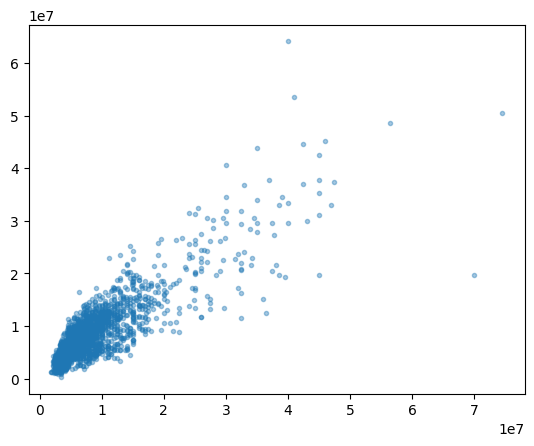

In [89]:
plt.scatter(y_test,y_pred,alpha=0.4,marker=".")
plt.show()

In [90]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()

lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

y_pred1 = lasso.predict(X_test)
y_pred2 = ridge.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = xgb.predict(X_test)

c:\Users\vian0001\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [91]:
print("R2 score LR: ", r2_score(y_test, y_pred))
print("R2 score Lasso: ", r2_score(y_test, y_pred1))
print("R2 score Ridge: ", r2_score(y_test, y_pred2))
print("R2 score rf: ", r2_score(y_test, y_pred3))
print("R2 score xgb: ", r2_score(y_test, y_pred4))

R2 score LR:  0.7284618139305714
R2 score Lasso:  0.7284618348956935
R2 score Ridge:  0.7284657574642431
R2 score rf:  0.7306357597700959
R2 score xgb:  0.7209552526473999


In [92]:
import pickle

In [93]:
pickle.dump(rf, open('RF.pkl', 'wb'))
pickle.dump(df1, open('df.pkl', 'wb'))

In [94]:
df.head(1)

,price,area,Bedrooms,Bathrooms,Status,neworold,type_of_building
0,5600000.0,1350.0,3.0,3.0,1,0,0
